# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS
Overview
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).
Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
•	Text: The content of the blog post. Column name: Data
•	Category: The category to which the blog post belongs. Column name: Labels
Tasks
1. Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.
2. Naive Bayes Model for Text Classification
•	Split the data into training and test sets.
•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
•	Train the model on the training set and make predictions on the test set.
3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
•	Examine the distribution of sentiments across different categories and summarize your findings.
4. Evaluation
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
•	Discuss the performance of the model and any challenges encountered during the classification process.
•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.
Submission Guidelines
•	Your submission should include a comprehensive report and the complete codebase.
•	Your code should be well-documented and include comments explaining the major steps.
Evaluation Criteria
•	Correct implementation of data preprocessing and feature extraction.
•	Accuracy and robustness of the Naive Bayes classification model.
•	Depth and insightfulness of the sentiment analysis.
•	Clarity and thoroughness of the evaluation and discussion sections.
•	Overall quality and organization of the report and code.
Good luck, and we look forward to your insightful analysis of the blog posts dataset!



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('blogs.csv')

## |1. Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.


In [17]:
df

Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

In [18]:
df.shape

(2000, 2)

In [19]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [20]:
df.duplicated

<bound method DataFrame.duplicated of                                                    Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]>

In [21]:
df.info

<bound method DataFrame.info of                                                    Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]>

In [22]:
df.describe()

Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100

In [26]:
df['Labels'].nunique()

20

In [27]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
stop_words = set(stopwords.words('english'))  # common words like the, is, and
lemmatizer = WordNetLemmatizer()

In [31]:
df['Data'][5]

'Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:120646 alt.atheism:53205 talk.religion.misc:83616\nPath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!uunet!gatekeeper.us.oracle.com!barrnet.net!kyle.eitech.com!kyle.eitech.com!not-for-mail\nFrom: ekr@squick.eitech.com (Eric Rescorla)\nNewsgroups: talk.abortion,alt.atheism,talk.religion.misc\nSubject: Re: After 2000 years, can we say that Christian Morality is\nDate: 15 Apr 1993 17:11:15 -0700\nOrganization: EIT\nLines: 40\nMessage-ID: <1qktj3$bn9@squick.eitech.com>\nReferences: <1qjd3o$nlv@horus.ap.mchp.sni.de> <1qk1pp$6hj@kyle.eitech.com> <1qkn1t$59l@horus.ap.mchp.sni.de>\nNNTP-Posting-Host: squick.eitech.com\n\nIn article <1qkn1t$59l@horus.ap.mchp.sni.de> frank@D012S658.uucp (Frank O\'Dwyer) writes:\n>In article <1qk1pp$6hj@kyle.eitech.com> ekr@kyle.eitech.com (Eric Rescorla) writes:\n>|In article <1qjd3o$nlv@horus.ap.mchp.sni.de> frank@D012S658.uucp (Frank O\'Dwyer) writes:\n>|>In article <sandvik-140493230024@sandvik-ke

In [32]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [33]:
def clean_text(text):
    # 1. Remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    
    # 3. Remove punctuation and non-letter characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # 4. Convert to lowercase
    text = text.lower() 
    # 5. Tokenize
    tokens = word_tokenize(text)    
    # 6. Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]   
    # 7. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]   
    # Return cleaned text as a single string
    return ' '.join(tokens)


In [37]:
import re
df['cleaned'] = df['Data'].astype(str).apply(clean_text)


In [38]:
df[['Data','cleaned']].sample(5)

Data  \
1135  Xref: cantaloupe.srv.cs.cmu.edu sci.crypt:1556...   
1771  Newsgroups: talk.politics.mideast\nPath: canta...   
1432  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...   
1795  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
282   Newsgroups: comp.os.ms-windows.misc\nPath: can...   

                                                cleaned  
1135  xref cantaloupe srv cmu edu sci crypt alt secu...  
1771  newsgroups talk politics mideast path cantalou...  
1432  path cantaloupe srv cmu edu rochester udel wup...  
1795  path cantaloupe srv cmu edu magnesium club cmu...  
282   newsgroups comp window misc path cantaloupe sr...

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1,2), sublinear_tf=True)
X_features = tfidf.fit_transform(df['cleaned'])

y_labels = df['Labels']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.2, stratify=y_labels, random_state=42
)

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB(alpha=1.0)
# Train model
nb_model.fit(X_train, y_train)

MultinomialNB()

In [43]:
y_pred = nb_model.predict(X_test)
y_pred

array(['sci.crypt', 'sci.med', 'talk.politics.mideast',
       'soc.religion.christian', 'talk.politics.guns', 'sci.med',
       'comp.windows.x', 'rec.motorcycles', 'talk.politics.mideast',
       'comp.graphics', 'comp.sys.mac.hardware', 'alt.atheism',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'misc.forsale', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
       'sci.med', 'misc.forsale', 'sci.electronics', 'sci.electronics',
       'rec.autos', 'rec.sport.baseball', 'sci.space', 'sci.electronics',
       'rec.autos', 'talk.politics.guns', 'misc.forsale', 'sci.med',
       'sci.electronics', 'talk.religion.misc', 'comp.graphics',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'comp.sys.ibm.pc.hardware', 'sci.electronics',
       'comp.os.ms-windows.misc', 'rec.sport.hockey', 'rec.motorcycles',
       'talk.religion.misc', 'rec.autos', 'comp.sys.ibm.pc.hardware',
       'talk.politics.mideast', 'talk.religion.misc', 'rec.sport.hockey',
   

accuracy: 0.93
                          precision    recall  f1-score   support

             alt.atheism       0.93      0.70      0.80        20
           comp.graphics       0.90      0.95      0.93        20
 comp.os.ms-windows.misc       0.95      1.00      0.98        20
comp.sys.ibm.pc.hardware       0.86      0.95      0.90        20
   comp.sys.mac.hardware       1.00      0.95      0.97        20
          comp.windows.x       1.00      0.90      0.95        20
            misc.forsale       0.95      1.00      0.98        20
               rec.autos       0.91      1.00      0.95        20
         rec.motorcycles       1.00      0.95      0.97        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       1.00      1.00      1.00        20
         sci.electronics       1.00      0.90      0.95        20
                 sci.med       0.95      0.95      0.95     

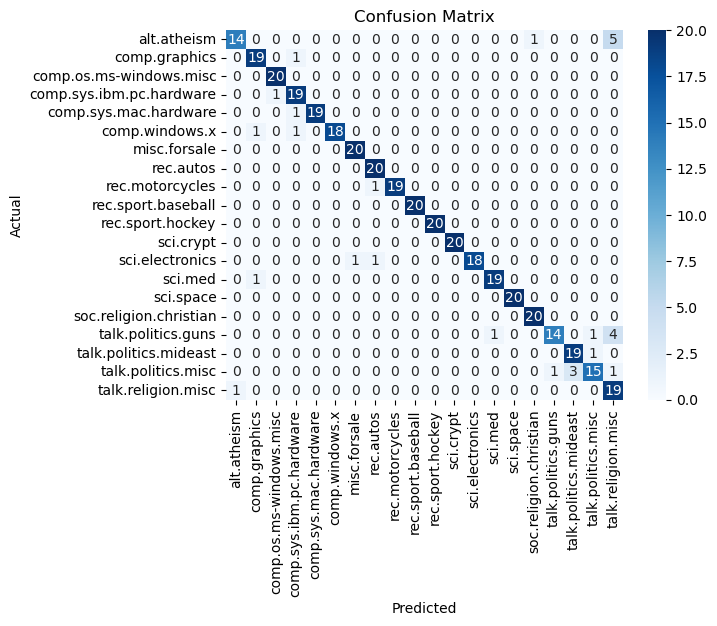

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
•	Examine the distribution of sentiments across different categories and summarize your findings.



In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon') 
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
df['sentiment_scores'] = df['Data'].astype(str).apply(lambda x: sia.polarity_scores(x))
df[['neg', 'neu', 'pos', 'compound']] = df['sentiment_scores'].apply(pd.Series)


In [49]:
def map_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['compound'].apply(map_sentiment)


sentiment
positive    1334
negative     631
neutral       35
Name: count, dtype: int64


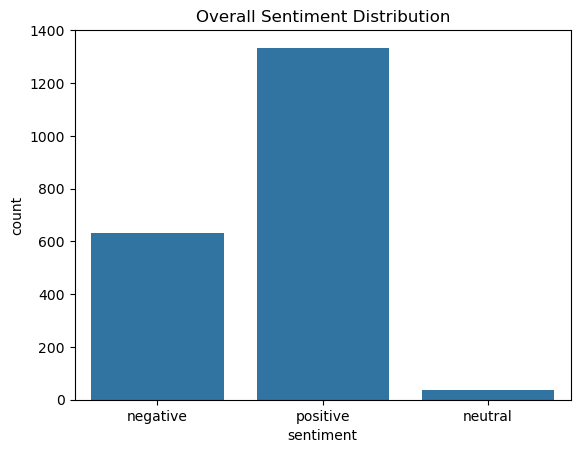

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)
plt.title('Overall Sentiment Distribution')
plt.show()









# Conclusion:
Naive Bayes Performance:
- Accuracy: 93%
- Precision/Recall/F1: >0.90 for most categories; lower (≈0.70–0.80) for discussion-heavy ones like alt.atheism and talk.politics.guns.
- Strengths: High accuracy in technical/recreational categories due to distinct vocabulary.
- Challenges: Overlapping vocabulary and unstructured text required heavy preprocessing.
Sentiment Analysis:
- Positive: 1334 posts
- Negative: 631 posts
- Neutral: 35 posts
- Trends: Recreational categories skew positive; political/discussion categories lean negative or neutral.
Implication:
Naive Bayes is effective for blog classification. Sentiment analysis adds depth by highlighting emotional tone across categories.
